# WeatherPy
----

### Analysis
* As expected, the weather becomes significantly warmer as one approaches the equator (0 Deg. Latitude). More interestingly, however, is the fact that the southern hemisphere tends to be warmer this time of year than the northern hemisphere. This may be due to the tilt of the earth.
* There is no strong relationship between latitude and cloudiness. However, it is interesting to see that a strong band of cities sits at 0, 80, and 100% cloudiness.
* There is no strong relationship between latitude and wind speed. However, in northern hemispheres there is a flurry of cities with over 20 mph of wind.

---

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [38]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import openweathermapy.core as owm
from datetime import datetime as dt
import pandas as pd
import numpy as np
import requests
import time
import csv

# Import API key
from api_keys import api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)


## Generate Cities List

In [39]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count
len(cities)


613

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [40]:
weather_data = pd.DataFrame(columns=["City", "Cloudiness", "Country", "Date", "Humidity", "Lat", "Lng", "Max Temp", "Wind Speed"])
weather_data.head()
# Create a settings object with your API key and preferred units
settings = {"units": "metric", "appid": api_key}
summary = ["main.humidity", "coord.lat", "coord.lon", "main.temp_max", "wind.speed", "clouds.all", "sys.country", "dt"]
# Get current weather
count = 0
result=[]
result.append(f"Beginning Data Retrieval    ")
result.append(f"------------------------------")
print(f"Beginning Data Retrieval    ")
print(f"------------------------------")
for city in cities:
    count = count + 1    
    try:
        current_weather = owm.get_current(city, **settings)
        result.append(f"Processing Record {count} of Set {len(cities)} | {city}") 
        print(f"Processing Record {count} of Set {len(cities)} | {city}") 
        data = current_weather(*summary)
        weather_data = weather_data.append({"City": city, "Date": data[7], "Lat": data[1], "Lng": data[2], "Max Temp": data[3], "Humidity": data[0], "Wind Speed": data[4], "Cloudiness": data[5], "Country": data[6]}, ignore_index=True)
    except: 
        result.append(f"City not found. Skipping...")
with open(output_data_file, mode='w', newline='') as summary:
    summary_writer = csv.writer(summary, delimiter=',')
    [summary_writer.writerow([x]) for x in result]


Beginning Data Retrieval    
------------------------------
Processing Record 2 of Set 613 | egvekinot
Processing Record 3 of Set 613 | atuona
Processing Record 4 of Set 613 | punta arenas
Processing Record 5 of Set 613 | cabo san lucas
Processing Record 6 of Set 613 | male
Processing Record 7 of Set 613 | nikolskoye
Processing Record 8 of Set 613 | mataura
Processing Record 9 of Set 613 | vao
Processing Record 10 of Set 613 | east london
Processing Record 11 of Set 613 | khatanga
Processing Record 12 of Set 613 | lillesand
Processing Record 14 of Set 613 | kodiak
Processing Record 15 of Set 613 | esperance
Processing Record 16 of Set 613 | westport
Processing Record 17 of Set 613 | talnakh
Processing Record 18 of Set 613 | esmeraldas
Processing Record 19 of Set 613 | chara
Processing Record 20 of Set 613 | bethel
Processing Record 21 of Set 613 | altay
Processing Record 24 of Set 613 | tasiilaq
Processing Record 25 of Set 613 | nanortalik
Processing Record 26 of Set 613 | krasnoznamen

Processing Record 217 of Set 613 | eenhana
Processing Record 218 of Set 613 | keita
Processing Record 219 of Set 613 | taoudenni
Processing Record 220 of Set 613 | honiara
Processing Record 221 of Set 613 | butaritari
Processing Record 222 of Set 613 | quchan
Processing Record 223 of Set 613 | ekhabi
Processing Record 224 of Set 613 | port hardy
Processing Record 225 of Set 613 | wanning
Processing Record 226 of Set 613 | ust-karsk
Processing Record 227 of Set 613 | pevek
Processing Record 228 of Set 613 | saint-pierre
Processing Record 229 of Set 613 | barao de melgaco
Processing Record 230 of Set 613 | hobart
Processing Record 231 of Set 613 | biltine
Processing Record 232 of Set 613 | isangel
Processing Record 233 of Set 613 | ugoofaaru
Processing Record 234 of Set 613 | paita
Processing Record 235 of Set 613 | cairns
Processing Record 236 of Set 613 | clyde river
Processing Record 237 of Set 613 | cumana
Processing Record 238 of Set 613 | itarema
Processing Record 239 of Set 613 | 

Processing Record 420 of Set 613 | morelia
Processing Record 421 of Set 613 | beloha
Processing Record 423 of Set 613 | pak phanang
Processing Record 425 of Set 613 | morondava
Processing Record 426 of Set 613 | viransehir
Processing Record 428 of Set 613 | yulara
Processing Record 429 of Set 613 | maturin
Processing Record 430 of Set 613 | mehran
Processing Record 431 of Set 613 | tilichiki
Processing Record 432 of Set 613 | mundo nuevo
Processing Record 433 of Set 613 | kenai
Processing Record 434 of Set 613 | kasama
Processing Record 435 of Set 613 | gondanglegi
Processing Record 436 of Set 613 | kalianget
Processing Record 438 of Set 613 | iguai
Processing Record 439 of Set 613 | dumas
Processing Record 440 of Set 613 | the valley
Processing Record 441 of Set 613 | carutapera
Processing Record 442 of Set 613 | faya
Processing Record 443 of Set 613 | whyalla
Processing Record 444 of Set 613 | venado tuerto
Processing Record 445 of Set 613 | aviles
Processing Record 447 of Set 613 | 

In [41]:

weather_data.head()

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,egvekinot,48,RU,1537509115,98,66.32,-179.17,6.01,0.95
1,atuona,44,PF,1537509115,100,-9.80,-139.03,26.16,4.80
2,punta arenas,75,CL,1537506000,100,-53.16,-70.91,3.00,3.60
3,cabo san lucas,8,MX,1537509115,100,22.89,-109.91,27.31,3.95
4,male,8,UA,1537509116,69,50.74,33.70,20.01,1.95


### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [42]:
weather_data.count()

City          548
Cloudiness    548
Country       548
Date          548
Humidity      548
Lat           548
Lng           548
Max Temp      548
Wind Speed    548
dtype: int64

### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

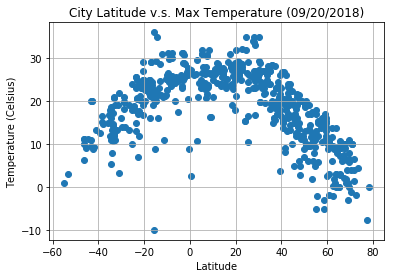

In [43]:
plt.scatter(weather_data["Lat"], weather_data["Max Temp"], marker="o")
plt.title("City Latitude v.s. Max Temperature (09/20/2018)")
plt.ylabel("Temperature (Celsius)")
plt.xlabel("Latitude")
plt.grid(True)
plt.savefig("MaxTemperature.png")

# Show plot
plt.show()

#### Latitude vs. Humidity Plot

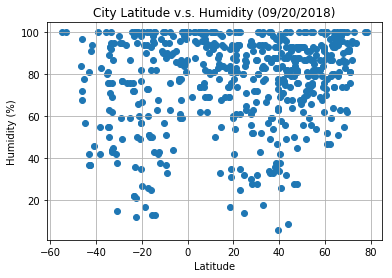

In [44]:
plt.scatter(weather_data["Lat"], weather_data["Humidity"], marker="o")
plt.title("City Latitude v.s. Humidity (09/20/2018)")
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
plt.savefig("Humidity.png")

# Show plot
plt.show()

#### Latitude vs. Cloudiness Plot

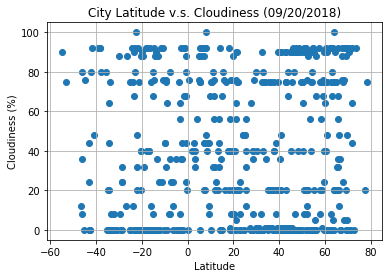

In [45]:
plt.scatter(weather_data["Lat"], weather_data["Cloudiness"], marker="o")
plt.title("City Latitude v.s. Cloudiness (09/20/2018)")
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
plt.savefig("Cloudiness.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

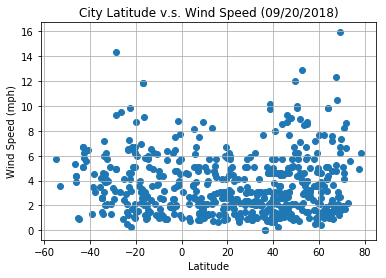

In [46]:
plt.scatter(weather_data["Lat"], weather_data["Wind Speed"], marker="o")
plt.title("City Latitude v.s. Wind Speed (09/20/2018)")
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
plt.savefig("WindSpeed.png")

# Show plot
plt.show()